<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Holt_winters_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import linregress
from statsmodels.iolib.table import SimpleTable
import seaborn as sns
from math import sqrt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index03-20.csv'
df = pd.read_csv(path, parse_dates=['Date'])
print(df.shape)
df.head()

(932, 3)


,Date,Conc,w_i
0,2003-01-05,26.200000,1.837894
1,2003-01-12,34.428571,2.415117
2,2003-01-19,9.428571,0.661401
3,2003-01-26,16.142857,1.132399
4,2003-02-02,6.833333,0.479349


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    932 non-null    datetime64[ns]
 1   Conc    929 non-null    float64       
 2   w_i     929 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 22.0 KB


In [6]:
df.set_index('Date', inplace=True)
df.head()

,Conc,w_i
Date,,
2003-01-05,26.200000,1.837894
2003-01-12,34.428571,2.415117
2003-01-19,9.428571,0.661401
2003-01-26,16.142857,1.132399
2003-02-02,6.833333,0.479349


In [7]:
#df['w_i'].iloc[lambda x: x == 'NaN']
df.fillna(method= 'pad', inplace=True)

In [8]:
df.iloc[80:].head(50)

,Conc,w_i
Date,,
2004-07-18,11.285714,0.836138
2004-07-25,22.333333,1.654637
2004-08-01,22.800000,1.689211
2004-08-08,23.000000,1.704029
2004-08-15,16.285714,1.206579
2004-08-22,21.142857,1.566436
2004-08-29,18.714286,1.386508
2004-09-05,22.500000,1.666985
2004-09-12,22.500000,1.666985


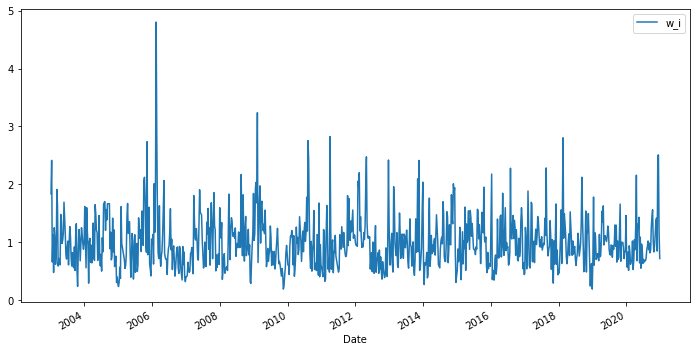

In [9]:
df[['w_i']].plot(figsize=(12,6))

In [10]:
df.index
df = df.asfreq('W')
#You must setup the frequency ts_log = ts_log.asfreq('W') https://stackoverflow.com/questions/64025453/attributeerror-rangeindex-object-has-no-attribute-inferred-freq

In [11]:
df.fillna(method= 'pad', inplace=True)

# **DF-test**

In [12]:
test = sm.tsa.adfuller(df.w_i)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical val; ', test[4])
if test[0] > test[4]['5%']:
  print('there are single roots. Nonfixed row')
else:
  print('No single roots found. Fixed row')  

adf:  -13.290835184848362
p-value:  7.368628374503391e-25
Critical val;  {'1%': -3.43735568849112, '5%': -2.864632808981867, '10%': -2.5684167960132225}
No single roots found. Fixed row


# **Decomposition**

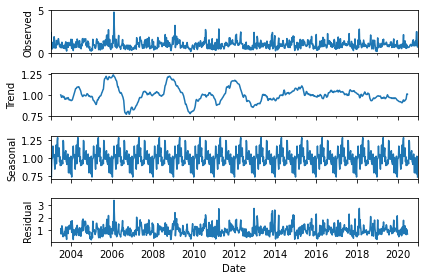

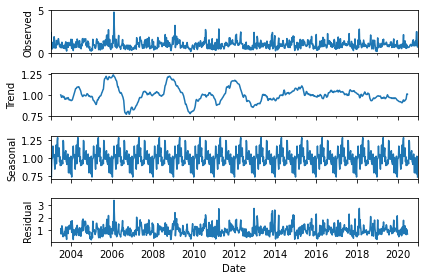

In [13]:
decompose_result = seasonal_decompose(df['w_i'], model='multiplicative')
decompose_result.plot()

# **Holt-Winters Exponential Smoothing (HWES)**

Simple Exponential Smoothing

In [14]:
df.index.freq = 'W'
m = 12
alpha = 1/(2*m)

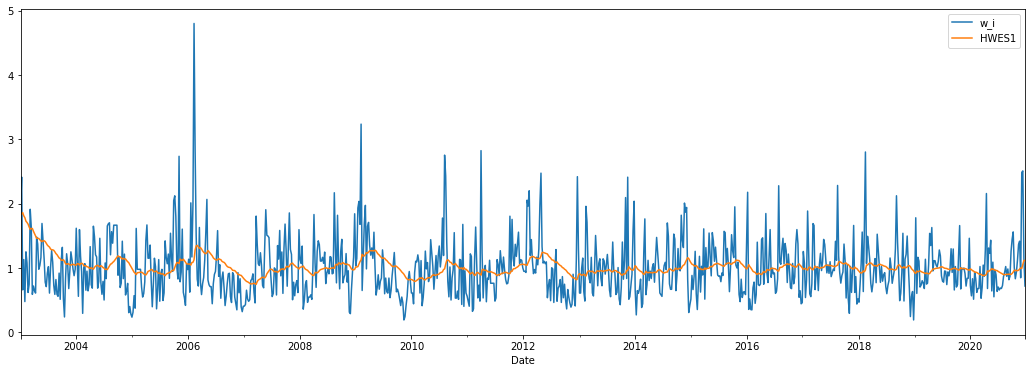

In [15]:
df['HWES1'] = SimpleExpSmoothing(df['w_i']).fit(smoothing_level = alpha, optimized = False, use_brute= True).fittedvalues
df[['w_i','HWES1']].plot(figsize = (18,6))

Exponential Smoothing

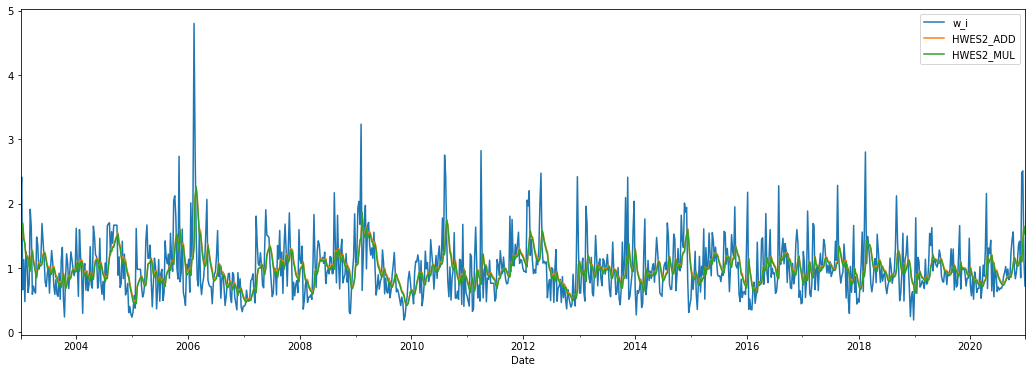

In [16]:
df['HWES2_ADD']=ExponentialSmoothing(df['w_i'], trend='add').fit().fittedvalues
df['HWES2_MUL']=ExponentialSmoothing(df['w_i'], trend='mul').fit().fittedvalues

df[['w_i','HWES2_ADD','HWES2_MUL']].plot(figsize=(18,6))

Exponential Smoothing (Triple HWES)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


LinregressResult(slope=0.42609194626281366, intercept=0.556994161387398, rvalue=0.6013693432240835, pvalue=2.030690138203735e-93, stderr=0.01849368039438704)

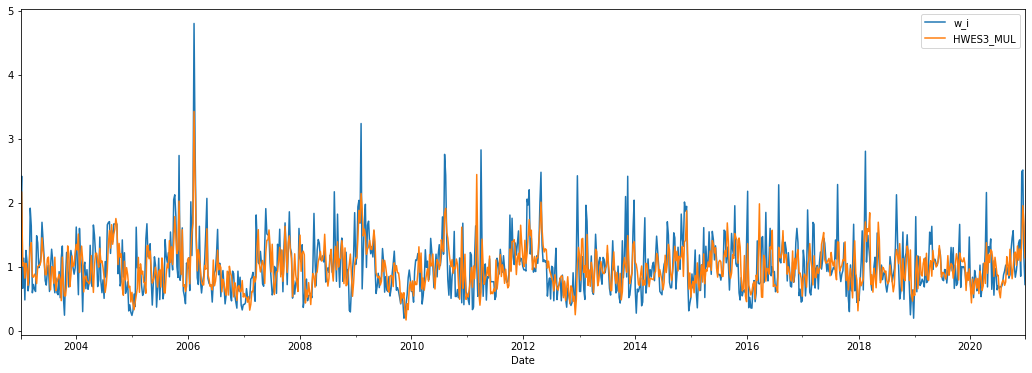

In [17]:
df['HWES3_ADD'] = ExponentialSmoothing(df['w_i'], trend='add', seasonal='add',seasonal_periods=276).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['w_i'], trend='mul', seasonal='mul',seasonal_periods=264).fit().fittedvalues
#263 264
df[['w_i',  'HWES3_MUL']].plot(figsize=(18,6))
r_value = linregress(df.w_i, df.HWES3_MUL)
r_value

LinregressResult(slope=0.4578461662766751, intercept=0.5430977468508776, rvalue=0.6072803938253396, pvalue=1.0313453999266836e-95, stderr=0.019568054165029325)

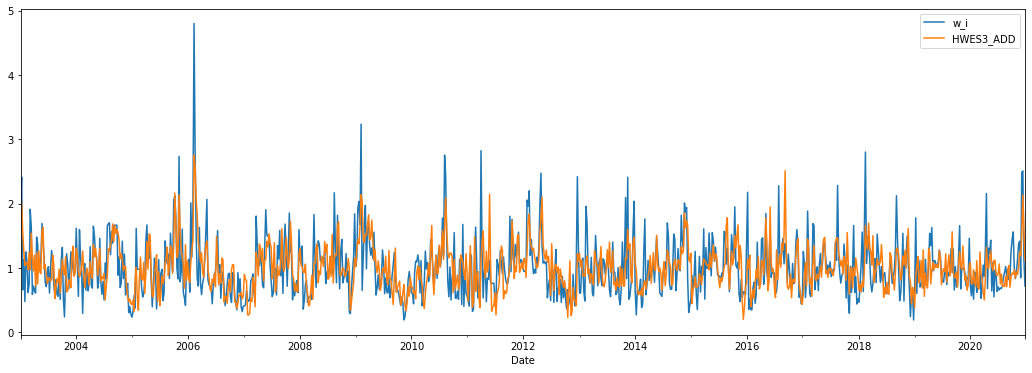

In [18]:
df[['w_i',  'HWES3_ADD']].plot(figsize=(18,6))
r_value = linregress(df.w_i, df.HWES3_ADD)
r_value

In [19]:
rms = sqrt(mean_squared_error(df.w_i, df.HWES3_MUL))
print(rms)

0.3655909908670552


In [20]:
r_value = linregress(df.w_i, df.HWES3_MUL)
r_value


LinregressResult(slope=0.42609194626281366, intercept=0.556994161387398, rvalue=0.6013693432240835, pvalue=2.030690138203735e-93, stderr=0.01849368039438704)

# **Forecasting with Triple HWES**

In [21]:
train_df = df[:620]
train_df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-10-19,26.571429,0.973920,0.995132,1.071413,1.051865,1.114713,1.163546
2014-10-26,26.142857,0.958212,0.994248,1.050353,1.029136,0.973644,1.121522
2014-11-02,49.714286,1.822173,0.992746,1.030450,1.008104,1.328427,1.161987
2014-11-09,39.000000,1.429463,1.027306,1.201472,1.187860,1.222933,1.315842
2014-11-16,36.000000,1.319505,1.044062,1.250721,1.236983,1.269035,0.846875


In [22]:
test_df = df[620:]
test_df.head()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-11-23,54.857143,2.010674,1.055539,1.265579,1.249810,1.855655,1.389381
2014-11-30,51.000000,1.869298,1.095336,1.426529,1.416416,1.624761,1.409200
2014-12-07,53.000000,1.942604,1.127585,1.522172,1.512433,1.736463,1.873357
2014-12-14,22.571429,0.827308,1.161544,1.612991,1.602873,1.656517,1.191822
2014-12-21,8.428571,0.308932,1.147617,1.443274,1.419469,1.136980,0.648265


In [23]:
test_df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2020-11-29,16.000000,0.849516,1.001656,1.189012,1.176548,1.188021,1.088109
2020-12-06,46.857143,2.487869,0.995317,1.115676,1.097486,1.505599,1.372077
2020-12-13,47.285714,2.510624,1.057506,1.412087,1.408462,2.134661,1.953580
2020-12-20,21.571429,1.145330,1.118053,1.649385,1.652849,1.599792,1.689130
2020-12-27,13.571429,0.720572,1.119189,1.540503,1.531012,1.121235,1.139905


In [24]:
train1_df= df[574:]
train1_df.head()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-01-05,17.714286,0.649280,1.036970,1.304916,1.295052,1.074576,1.068231
2014-01-12,7.428571,0.272279,1.020816,1.163290,1.142348,0.962792,1.033330
2014-01-19,17.714286,0.649280,0.989627,0.970821,0.939504,0.675144,0.922888
2014-01-26,16.571429,0.607391,0.975446,0.901364,0.869084,0.584820,0.722993
2014-02-02,18.428571,0.675461,0.960110,0.837862,0.805465,0.634200,0.704272


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


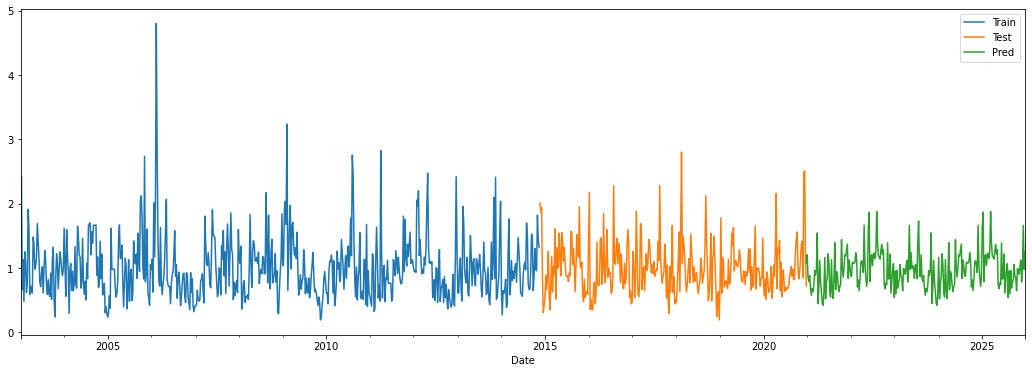

In [25]:
fitted_model = ExponentialSmoothing(test_df['w_i'], seasonal_periods=136, trend='add',seasonal='mul').fit()
test_predictions = fitted_model.forecast(312)
pred_for = fitted_model.predict(start='2020-12-27', end='2025-12-28')
#start='2020-12-27', end='2025-12-28' start='2014-11-23', end='2020-12-27'
train_df['w_i'].plot(legend=True, label='Train')
test_df['w_i'].plot(legend=True, label= 'Test', figsize = (18,6))
pred_for.plot(legend=True, label= 'Pred')
#r_value = linregress(test_df.w_i, pred_for)
#r_value
#138 136 134


In [26]:
df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2020-11-29,16.000000,0.849516,1.001656,1.189012,1.176548,1.188021,1.088109
2020-12-06,46.857143,2.487869,0.995317,1.115676,1.097486,1.505599,1.372077
2020-12-13,47.285714,2.510624,1.057506,1.412087,1.408462,2.134661,1.953580
2020-12-20,21.571429,1.145330,1.118053,1.649385,1.652849,1.599792,1.689130
2020-12-27,13.571429,0.720572,1.119189,1.540503,1.531012,1.121235,1.139905


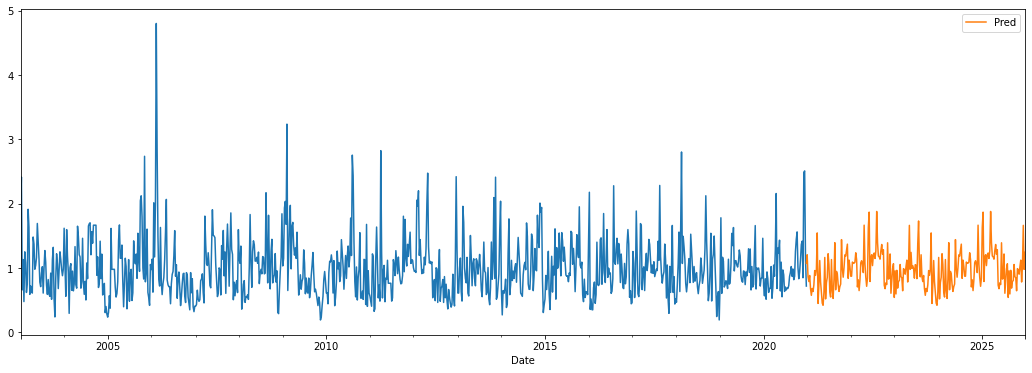

In [27]:
df['w_i'].plot(figsize = (18,6))
pred_for.plot(legend=True, label= 'Pred')

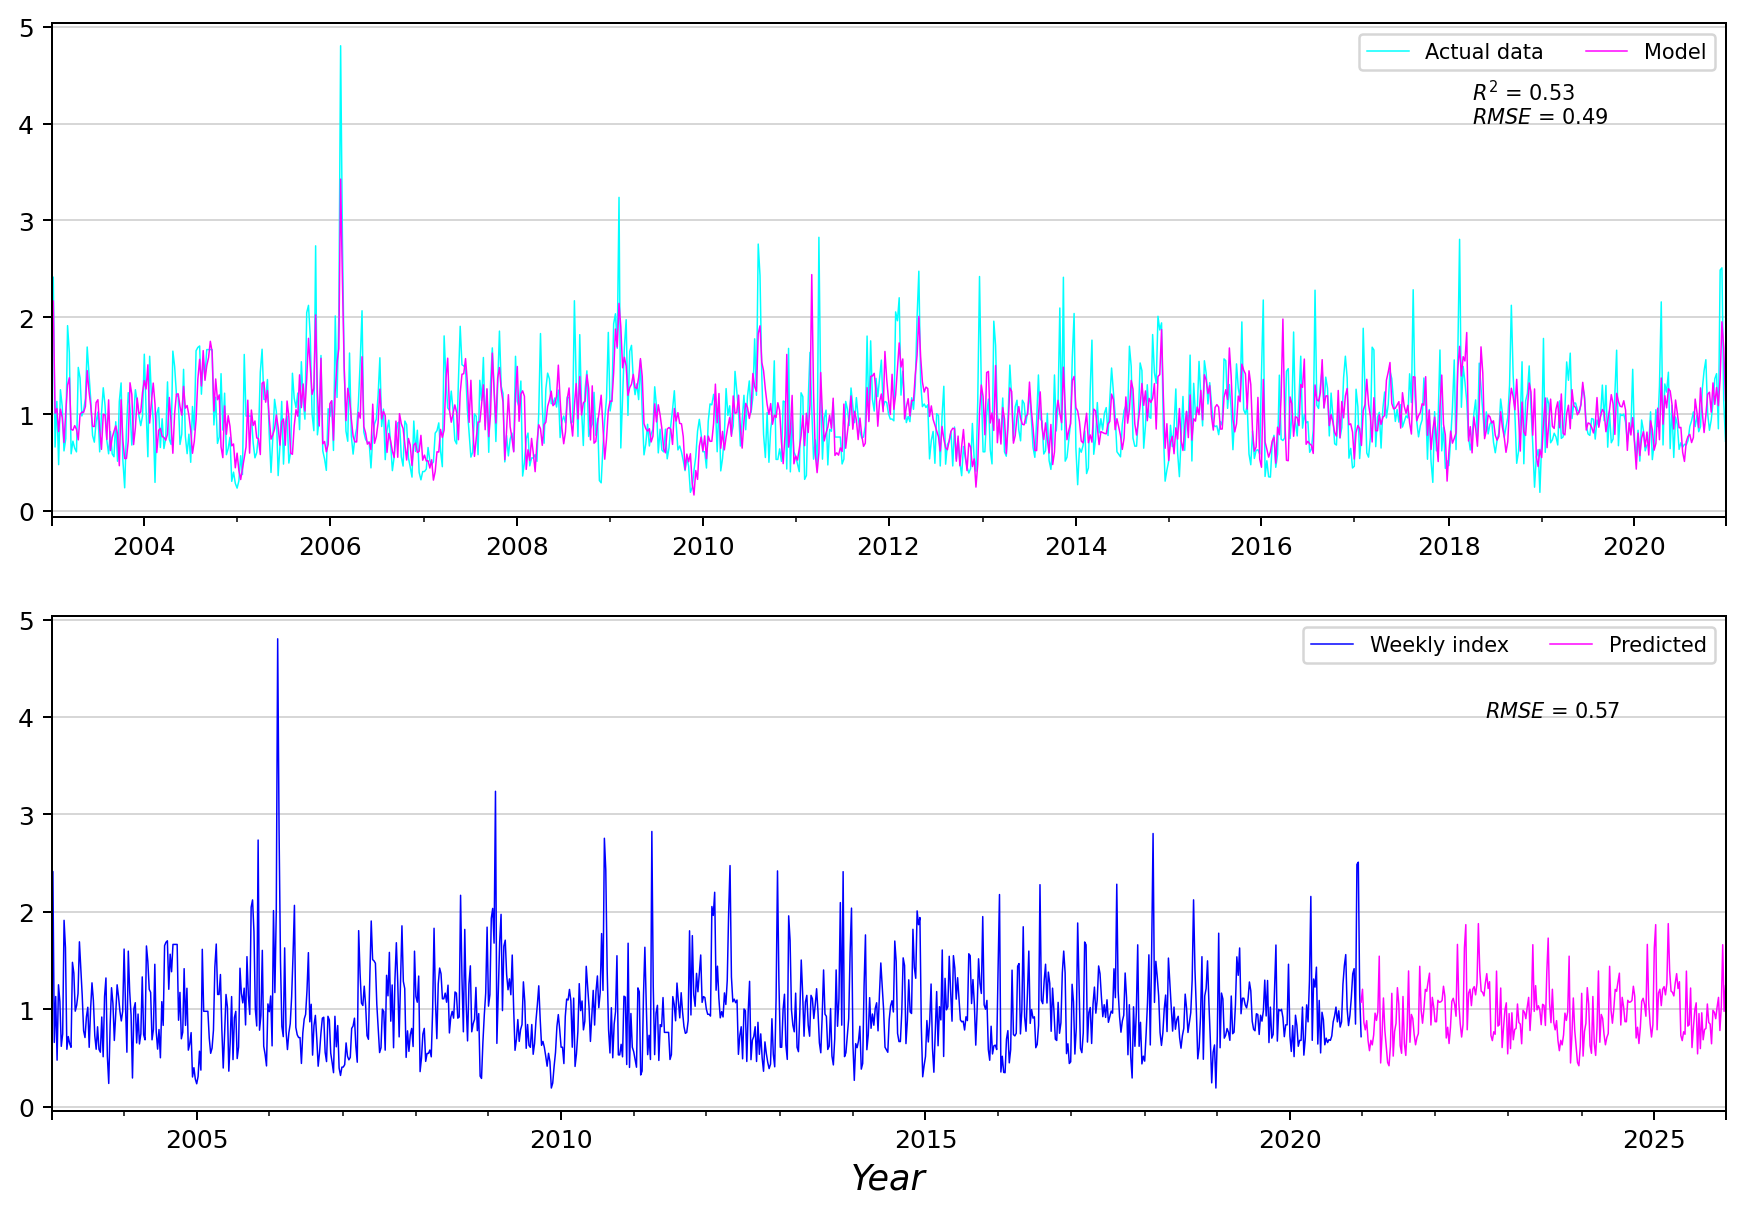

In [28]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (12,8), dpi=180)
df['w_i'].plot(ax=ax1,
               linewidth = 0.6,
               color = 'cyan')
df['HWES3_MUL'].plot(ax=ax1,
                     linewidth = 0.6,
                     color='magenta')
ax1.set_xlabel('')
ax1.legend(labels=["Actual data","Model"], fontsize = 'small', loc = 1, ncol = 2)
ax1.grid(axis = 'y', alpha =0.5)
ax1.text(2519, 4, '$R^2$ = 0.53 \n$RMSE$ = 0.49', fontsize = 'small')
df['w_i'].plot(ax=ax2,
               linewidth = 0.6,
               color = 'blue')
pred_for.plot(ax=ax2, 
              linewidth = 0.6,
              color='magenta')
ax2.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax2.grid(axis='y', alpha = 0.5)
ax2.legend(labels=["Weekly index","Predicted"], fontsize = 'small', loc = 1, ncol = 2)
ax2.text(2750, 4, '$RMSE$ = 0.57', fontsize = 'small')
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig8.png', dpi = 180)
plt.show()

# **ARIMA (Autoregressive Integrated Moving Average)**

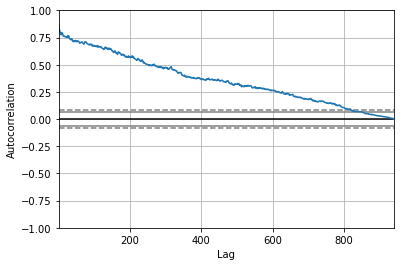

In [29]:
autocorrelation_plot(df)

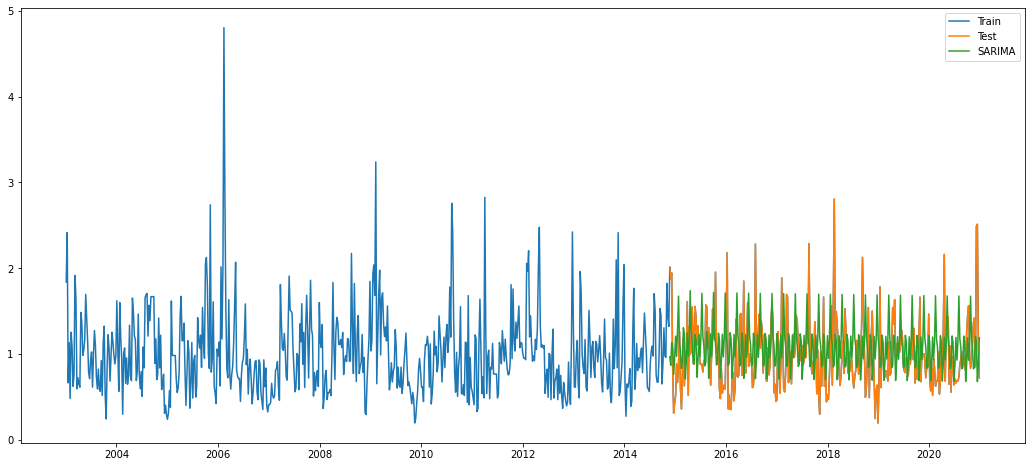

LinregressResult(slope=-0.04718362887140633, intercept=1.1300083995443202, rvalue=-0.07699141601542275, pvalue=0.1701414532347616, stderr=0.034318507466103126)

In [30]:
df_arima = test_df.copy()
fit1 = sm.tsa.statespace.SARIMAX(df.w_i, order=(1,1,1), seasonal_order=(1,1,0,12)).fit()
df_arima['SARIMA'] = fit1.predict(start = '2014-11-23', end = '2020-12-27', dynamic=True) 
plt.figure(figsize=(18,8))
plt.plot(df['w_i'], label='Train')
plt.plot(test_df['w_i'], label='Test')
plt.plot(df_arima['SARIMA'], label='SARIMA')
plt.legend()
plt.show()
r_value = linregress(test_df.w_i, df_arima['SARIMA'])
r_value

In [31]:
rms = sqrt(mean_squared_error(test_df.w_i, df_arima.SARIMA))
print(rms)

0.4936444231324422


# **Prophet**

In [32]:
from fbprophet import Prophet
import matplotlib.patches as mpatches

In [33]:
df1 = df.drop(['Conc', 'HWES1', 'HWES2_ADD','HWES2_MUL','HWES3_ADD',	'HWES3_MUL'], axis=1)
df1.reset_index(['Date'], inplace=True)
df1.columns = ['ds','y']
df1.index = df1.ds
df1.head(50)

,ds,y
ds,,
2003-01-05,2003-01-05,1.837894
2003-01-12,2003-01-12,2.415117
2003-01-19,2003-01-19,0.661401
2003-01-26,2003-01-26,1.132399
2003-02-02,2003-02-02,0.479349
2003-02-09,2003-02-09,1.252654
2003-02-16,2003-02-16,1.082293
2003-02-23,2003-02-23,0.621316
2003-03-02,2003-03-02,0.748252


In [34]:
df1.index[365]

Timestamp('2010-01-03 00:00:00')

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939 entries, 2003-01-05 to 2020-12-27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      939 non-null    datetime64[ns]
 1   y       939 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.0 KB


In [36]:
df1.tail()

,ds,y
ds,,
2020-11-29,2020-11-29,0.849516
2020-12-06,2020-12-06,2.487869
2020-12-13,2020-12-13,2.510624
2020-12-20,2020-12-20,1.145330
2020-12-27,2020-12-27,0.720572


In [37]:
#this function was taken from https://medium.com/analytics-vidhya/time-series-forecast-anomaly-detection-with-facebook-prophet-558136be4b8d
def prophet_fit(dtf, prophet_model, today_index, lookback_days=None, predict_days=53):
    
    # segment the time frames
    baseline_ts = dtf['ds'][:today_index]
    baseline_y = dtf['y'][:today_index]
    if not lookback_days:
        print('Use the data from {} to {} ({} weeks)'.format(dtf['ds'][0], dtf['ds'][today_index - 1], today_index))
    else:
        baseline_ts = dtf['ds'][today_index - lookback_days:today_index]
        baseline_y = dtf.y[today_index - lookback_days:today_index]
        print('Use the data from {} to {} ({} weeks)'.format(dtf['ds'] [today_index - lookback_days], dtf['ds'][today_index - 1], lookback_days))
        print('Predict {} to {} ({} weeks)'.format(dtf['ds'][today_index], dtf['ds'][today_index + predict_days - 1], predict_days))

    # fit the model
    prophet_model.fit(pd.DataFrame({'ds': baseline_ts.values,
                                    'y': baseline_y.values}))
    future = prophet_model.make_future_dataframe(periods=predict_days, freq='W')
    # make prediction
    forecast = prophet_model.predict(future)
    # generate the plot
    fig = prophet_model.plot(forecast, figsize=(12,4))
    return fig, forecast, prophet_model

In [38]:
#this one was taken from https://github.com/paullo0106/prophet_anomaly_detection/blob/master/utils.py
def prophet_plot(df, fig1, forecast, today_index, lookback_days=261, predict_days=21, outliers=list()):
    
    # retrieve the subplot in the generated Prophets matplotlib figure
    #ax = fig.get_axes()[0]
    ax = fig.gca()
    a =fig.get_axes()[0]
    ax.get_lines()[0].set_marker('')
    ax.get_lines()[1].set_linewidth(0.8)
    ax.get_lines()[1].set_color('blue')
    ax.fill_between(forecast.ds, forecast.yhat_upper, forecast.yhat_lower,color = 'deepskyblue', alpha = 0.2)
    start = 0
    end = today_index + predict_days
    x_pydatetime = df['ds'].dt.to_pydatetime()
    # highlight the actual values of the entire time frame
    a.plot(x_pydatetime[start:end],
            df.y[start:end],
            color='green', label='Actual', linewidth = 0.8)
    # highlight the actual values of the testing dataframe
    a.scatter(x_pydatetime[today_index:], df.y[today_index:], label='Actual', color='black', s = 6, marker = '')

    # plot each outlier in red dot and annotate the date
    for outlier in outliers:
        a.scatter(outlier[0], outlier[1], color='red', label='Anomaly')
        #ax.text(outlier[0], outlier[1], str(outlier[0])[:10], color='red')

    # highlight baseline time frame with gray background    
    
    if lookback_days:
      start = today_index - lookback_days
    a.axvspan(x_pydatetime[start],
              x_pydatetime[today_index],
              color=sns.xkcd_rgb['grey'],
              alpha=0.2) 
    
    # annotate the areas, and position the text at the bottom 5% by using ymin + (ymax - ymin) / 20
    ymin, ymax = a.get_ylim()[0], a.get_ylim()[1]
    a.text(x_pydatetime[int((start + today_index) / 2)], ymin + (ymax - ymin) / 20, 'Training data')
    a.text(x_pydatetime[int((today_index * 2 + predict_days) / 2)], ymin + (ymax - ymin) / 20, 'Test data')

    #set axis parameters
    ax.set_xlabel('Year',
                  fontsize = 12,
                  fontstyle='oblique',
                  fontweight = 'medium')
    ax.set_ylabel('Weekly index',
                  fontsize = 12,
                  fontstyle='oblique', 
                  fontweight = 'normal')
    ax.tick_params(axis="x", labelsize=11)
    ax.tick_params(axis="y", labelsize=11)

    # re-organize the legend
    patch1 = mpatches.Patch(color='red', label='Anomaly detected')
    patch2 = mpatches.Patch(color='green', label='Actual')
    patch3 = mpatches.Patch(color='deepskyblue', label='Predict and interval', alpha=0.2)
    patch4 = mpatches.Patch(color='grey', label='Training data')
    plt.legend(handles=[patch1, patch2, patch3, patch4], fontsize = 9, ncol=2, loc = 1, frameon = False)    
    plt.rcParams['figure.dpi'] = 180
    plt.show()

In [39]:
def get_outliers(df, forecast, today_index, predict_days=21):
    """
    Combine the actual values and forecast in a data frame and identify the outliers
    Args
    ----
    df : pandas DataFrame
        The daily time-series data set contains ds column for
        dates (datetime types such as datetime64[ns]) and y column for numerical values
    forecast : pandas DataFrame
        The predicted result in a dataframe which was previously generated by
        Prophet's model.predict(future)
    today_index : int
        The summary statistics of the right tree node.
    predict_days : int, optional (default=21)
        The time frame we segment as prediction period
    Returns
    -------
    outliers : a list of (datetime, int) tuple
        A list of outliers, the date and the value for each
    df_pred : pandas DataFrame
        The data set contains actual and predictions for the forecast time frame
    """
    df_pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(predict_days)
    df_pred.index = df_pred['ds'].dt.to_pydatetime()
    df_pred.columns = ['ds', 'preds', 'lower_y', 'upper_y']
    df_pred['actual'] = df['y'][today_index: today_index + predict_days].values

    # construct a list of outliers
    outlier_index = list()
    outliers = list()
    for i in range(df_pred.shape[0]):
        actual_value = df_pred['actual'][i]
        if actual_value > df_pred['upper_y'][i]:
            outlier_index += [i]
            outliers.append((df_pred.index[i], actual_value))
            # optional, print out the evaluation for each outlier
            print('=====')
            print('actual value {} fall outside of the prediction interval'.format(actual_value))
            print('interval: {} to {}'.format(df_pred['lower_y'][i], df_pred['upper_y'][i]))
            print('Date: {}'.format(str(df_pred.index[i])[:10]))

    return outliers, df_pred

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


Cutoff date: 2015-01-04 00:00:00
Use the data from 2010-01-03 00:00:00 to 2014-12-28 00:00:00 (261 weeks)
Predict 2015-01-04 00:00:00 to 2020-12-20 00:00:00 (312 weeks)
=====
actual value 1.6098470719880638 fall outside of the prediction interval
interval: -0.12455159408179169 to 1.5598607753792124
Date: 2015-03-29
=====
actual value 1.952505284097973 fall outside of the prediction interval
interval: 0.12900610662527184 to 1.7925777738371504
Date: 2015-10-18
=====
actual value 2.1787238458445217 fall outside of the prediction interval
interval: -0.11509987522352073 to 1.5539899286146441
Date: 2016-01-10
=====
actual value 2.279902971812533 fall outside of the prediction interval
interval: 0.5869954474906651 to 2.262908034650166
Date: 2016-07-31
=====
actual value 2.2845450825262588 fall outside of the prediction interval
interval: 0.23169461029384086 to 1.914277027223578
Date: 2017-08-20
=====
actual value 2.8047661023131405 fall outside of the prediction interval
interval: 0.339823790

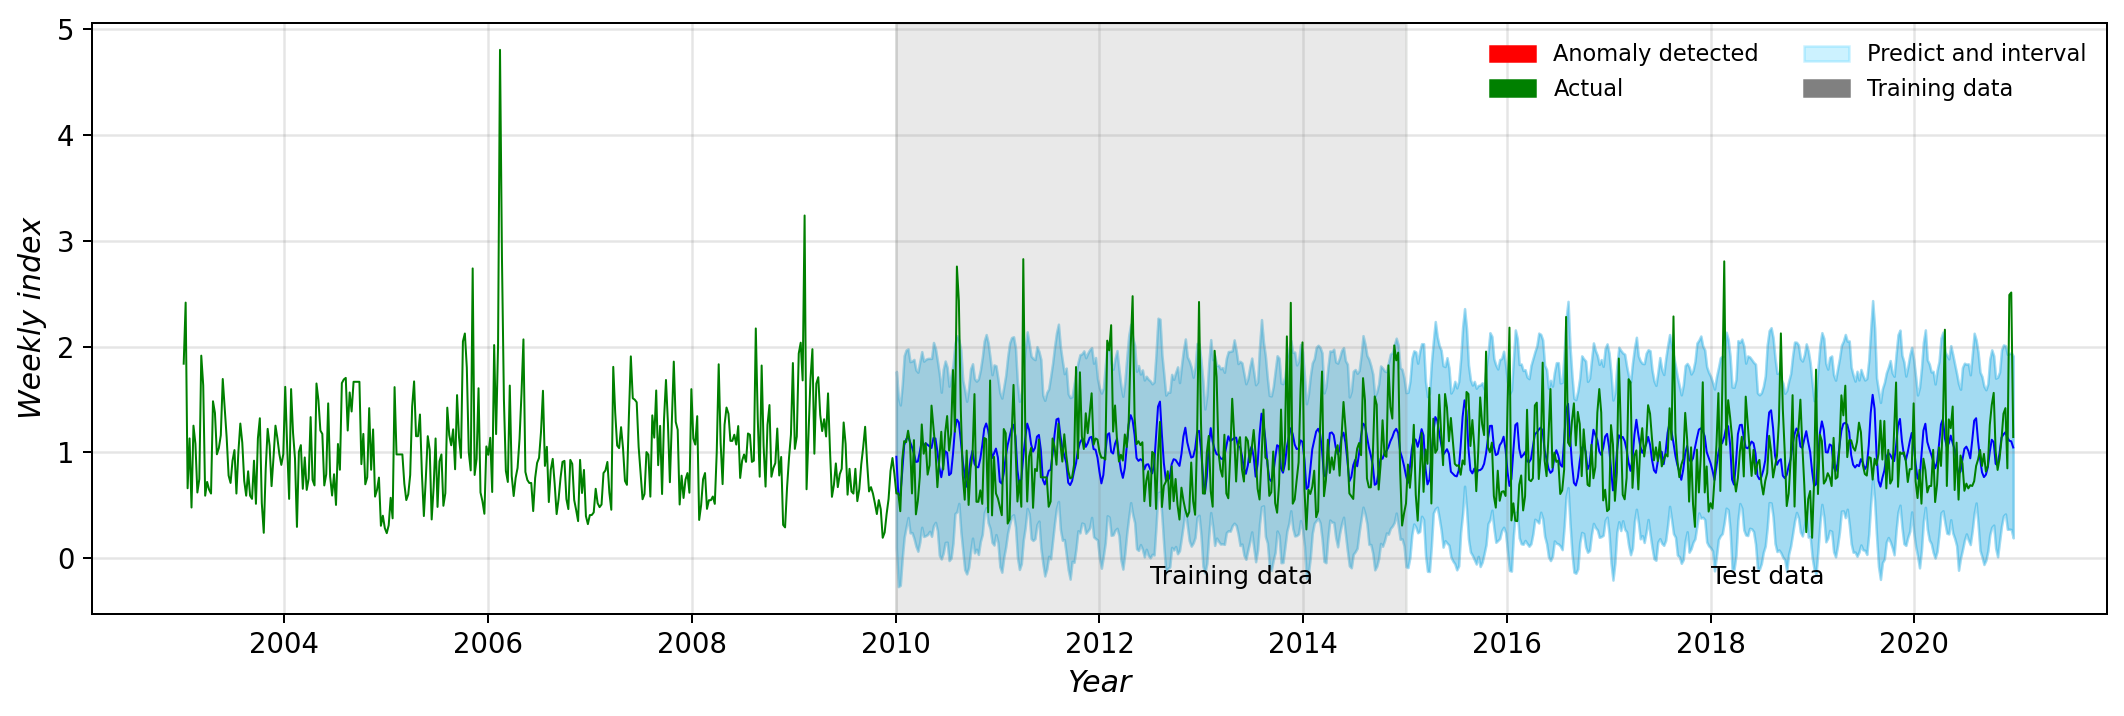

In [47]:
#Settings 1
m = Prophet(interval_width=0.95, 
            changepoint_range=0.3, 
            weekly_seasonality=True, 
            daily_seasonality=True,
            changepoint_prior_scale=0.7)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.add_seasonality(name='yearly', period=365, fourier_order=10)
#m.fit(df1)
today_index = 626
print('Cutoff date:', df1.index[today_index])
lookback_n = 261
predict_n = 6*52
fig, forecast, m = prophet_fit(df1, m, today_index=today_index, lookback_days=lookback_n,  predict_days=predict_n)
outliers, df_pred = get_outliers(df1, forecast, today_index=today_index, predict_days=predict_n)
prophet_plot(df1, fig, forecast, today_index=today_index, predict_days=predict_n)

Metrics for Prophet model

In [43]:
from fbprophet.diagnostics import performance_metrics, cross_validation

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
r2_score(df1.y.iloc[365:626], forecast.yhat.iloc[:261])

0.13701962858805516

In [48]:
MAPE = np.mean(np.abs((df_pred.actual - df_pred.preds) / df_pred.actual)) * 100
print(MAPE)

38.37364752138369


In [49]:
mean_absolute_error(df_pred.preds, df_pred.actual)

0.32084242191432255

In [50]:
mean_squared_error(df_pred.preds, df_pred.actual)

0.17089638922785738

In [51]:
df_pred.head()

,ds,preds,lower_y,upper_y,actual
2015-01-04,2015-01-04,0.781799,-0.079752,1.565015,0.517220
2015-01-11,2015-01-11,0.712041,-0.087477,1.568337,0.885739
2015-01-18,2015-01-18,0.856099,0.007957,1.670441,0.665921
2015-01-25,2015-01-25,1.029185,0.220562,1.889470,0.872809
2015-02-01,2015-02-01,1.129563,0.323944,1.959358,1.260724


In [52]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,0.658453,0.101557,1.765177,0.658453,0.658453,0.300285,0.300285,0.300285,0.191055,0.191055,0.191055,0.103856,0.103856,0.103856,0.143291,0.143291,0.143291,-0.137917,-0.137917,-0.137917,0.0,0.0,0.0,0.958738
1,2010-01-10,0.658504,-0.268053,1.524685,0.658504,0.658504,-0.053191,-0.053191,-0.053191,0.191055,0.191055,0.191055,-0.116932,-0.116932,-0.116932,0.143291,0.143291,0.143291,-0.270605,-0.270605,-0.270605,0.0,0.0,0.0,0.605313
2,2010-01-17,0.658554,-0.254829,1.448600,0.658554,0.658554,-0.069496,-0.069496,-0.069496,0.191055,0.191055,0.191055,-0.149284,-0.149284,-0.149284,0.143291,0.143291,0.143291,-0.254558,-0.254558,-0.254558,0.0,0.0,0.0,0.589057
3,2010-01-24,0.658604,-0.001184,1.639350,0.658604,0.658604,0.156731,0.156731,0.156731,0.191055,0.191055,0.191055,-0.073837,-0.073837,-0.073837,0.143291,0.143291,0.143291,-0.103777,-0.103777,-0.103777,0.0,0.0,0.0,0.815335
4,2010-01-31,0.658654,0.199513,1.914388,0.658654,0.658654,0.409910,0.409910,0.409910,0.191055,0.191055,0.191055,0.016056,0.016056,0.016056,0.143291,0.143291,0.143291,0.059509,0.059509,0.059509,0.0,0.0,0.0,1.068564


In [53]:
forecast.loc[209]

ds                            2014-01-05 00:00:00
trend                                    0.668524
yhat_lower                                0.11599
yhat_upper                                1.71703
trend_lower                              0.668524
trend_upper                              0.668524
additive_terms                           0.262501
additive_terms_lower                     0.262501
additive_terms_upper                     0.262501
daily                                    0.191055
daily_lower                              0.191055
daily_upper                              0.191055
monthly                                  0.135875
monthly_lower                            0.135875
monthly_upper                            0.135875
weekly                                   0.143291
weekly_lower                             0.143291
weekly_upper                             0.143291
yearly                                   -0.20772
yearly_lower                             -0.20772


In [54]:
df_mod = df1.iloc[365:939]
df_mod.head(50)

,ds,y
ds,,
2010-01-03,2010-01-03,0.612443
2010-01-10,2010-01-10,0.612443
2010-01-17,2010-01-17,0.444515
2010-01-24,2010-01-24,0.928542
2010-01-31,2010-01-31,1.106348
2010-02-07,2010-02-07,1.096470
2010-02-14,2010-02-14,1.205129
2010-02-21,2010-02-21,1.086592
2010-02-28,2010-02-28,0.612443


In [55]:
df_mod.shape

(574, 2)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


Cutoff date: 2020-12-27 00:00:00
Use the data from 2010-01-03 00:00:00 to 2020-12-20 00:00:00 (573 weeks)


IndexError: ignored

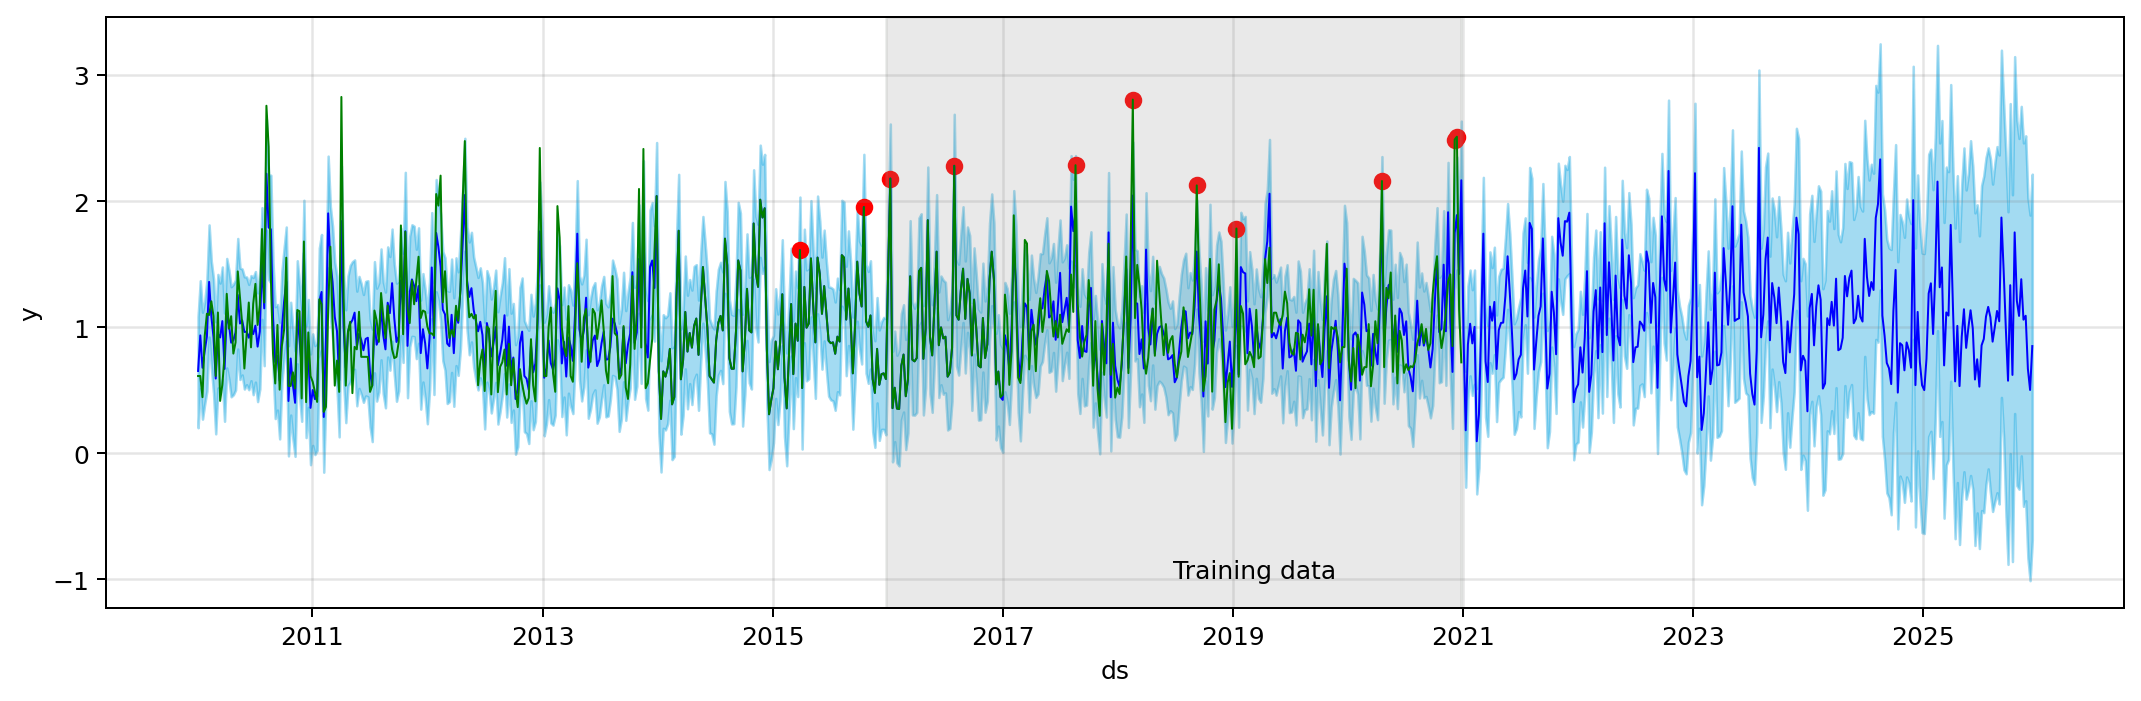

In [56]:
#Settings 2
m = Prophet(interval_width=0.95, 
            changepoint_range=0.3, 
            weekly_seasonality=True, 
            daily_seasonality=True,
            changepoint_prior_scale=0.6)
m.add_seasonality(name='monthly', period=31, fourier_order=30)
m.add_seasonality(name='weekly', period=7, fourier_order=10)
m.add_seasonality(name='yearly', period=365, fourier_order=185)
#m.fit(df1)
today_index = 573
print('Cutoff date:', df_mod.index[today_index])
#lookback_n = 573
predict_n = 5*52
fig, forecast1, m = prophet_fit(df_mod, m, today_index=today_index, predict_days=predict_n)
#outliers, df_pred = get_outliers(df1, forecast, today_index=today_index, predict_days=predict_n)
prophet_plot(df_mod, fig, forecast1, today_index=today_index, predict_days=predict_n, outliers=outliers)

In [57]:
r2_score(df_mod.y.iloc[:573], forecast1.yhat.iloc[:573])

0.7182612195279131

In [58]:
forecast1.shape

(833, 25)

In [59]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,0.614571,0.202256,1.083055,0.614571,0.614571,0.037831,0.037831,0.037831,0.165679,0.165679,0.165679,-0.156401,-0.156401,-0.156401,0.124259,0.124259,0.124259,-0.095706,-0.095706,-0.095706,0.0,0.0,0.0,0.652402
1,2010-01-10,0.615761,0.512204,1.368334,0.615761,0.615761,0.318740,0.318740,0.318740,0.165679,0.165679,0.165679,0.178090,0.178090,0.178090,0.124259,0.124259,0.124259,-0.149288,-0.149288,-0.149288,0.0,0.0,0.0,0.934501
2,2010-01-17,0.616951,0.270010,1.118541,0.616951,0.616951,0.060957,0.060957,0.060957,0.165679,0.165679,0.165679,-0.138173,-0.138173,-0.138173,0.124259,0.124259,0.124259,-0.090808,-0.090808,-0.090808,0.0,0.0,0.0,0.677908
3,2010-01-24,0.618141,0.389726,1.203256,0.618141,0.618141,0.192791,0.192791,0.192791,0.165679,0.165679,0.165679,-0.337517,-0.337517,-0.337517,0.124259,0.124259,0.124259,0.240370,0.240370,0.240370,0.0,0.0,0.0,0.810932
4,2010-01-31,0.619331,0.493158,1.370894,0.619331,0.619331,0.306879,0.306879,0.306879,0.165679,0.165679,0.165679,0.075256,0.075256,0.075256,0.124259,0.124259,0.124259,-0.058314,-0.058314,-0.058314,0.0,0.0,0.0,0.926210


In [ ]:
pred = m.predict(future)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(pred)

In [ ]:
m1 = Prophet(seasonality_mode='multiplicative').fit(df1)
future1 = m1.make_future_dataframe(periods=260, freq = 'w')
fcst=m1.predict(future1)
fcst.tail()

In [ ]:
fig2=m1.plot(fcst, uncertainty=False, plot_cap=True, figsize=(16,8))
ax = fig2.gca()
ax.set_xlabel('Year',
               fontsize = 24,
               fontstyle='oblique',
               fontweight = 'medium')
ax.set_ylabel('Weekly index',
               fontsize = 24,
               fontstyle='oblique',
               fontweight = 'normal')
ax.tick_params(axis="x", labelsize=22)
ax.tick_params(axis="y", labelsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_lw(1.25)
ax.spines['bottom'].set_lw(1.25)
actual=ax.get_lines()[0]
predict= ax.get_lines()[1]
actual.set_marker('.')
actual.set_markerfacecolor('gray')
actual.set_markersize(8)
predict.set_color('navy')
ax.fill_between(fcst.ds, fcst.yhat_upper, fcst.yhat_lower,color = 'deepskyblue')
#ax.text(2024, 4, '$RMSE$ = 0.53', fontsize = 22)
ax.legend(labels=['Actual', 'Forecast'], fontsize = 22, ncol=2, loc = 1)
#fig2.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig9.png', dpi = 80)

In [ ]:
se = np.square(forecast.loc[:, 'yhat'] - df1.y)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def t_test(dat1, dat2):
  stat, p = ttest_ind(dat1, dat2)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha1 = 0.05
  if p > alpha1:
      print('Same distributions (fail to reject H0)')
  else:
      print('Different distributions (reject H0)')  
  return stat, p


data1 = df.w_i
data2 = df.HWES3_MUL
t_test(data1, data2)


In [ ]:
data3 = fcst.yhat
t_test(data2, data3)


In [ ]:
my_data = [[0.57, 0.53, 1.07],['-','-','-']]
col = [u'Holt-Winters', u'Prophet', u'Holt-Winters vs \n Prophet']
row = ['RMSE', 'R^2']
tbl = SimpleTable(my_data, col, row)
print(tbl)

In [ ]:
my_data1 = [[0.980, -1.628],[0.327, 0.104]]
col1 = [u'Actual data \n Holt-Winters', u'Holt-Winters vs \n Prophet']
row1 = ['Statistics', 'p-value']
tbl = SimpleTable(my_data1, col1, row1)
print(tbl)